In [322]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import glob
import os

In [323]:
tf.__version__

'2.2.0'

# 获取数据集

In [324]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [325]:
train_images.shape

(60000, 28, 28)

In [326]:
train_images.dtype

dtype('uint8')

In [327]:
# 转变类型train_images
train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')

In [328]:
train_images.dtype

dtype('float32')

In [329]:
train_images = (train_images-127.5)/127.5

In [330]:
BATCH_SIZE = 256
BUFFER_SIZE = 60000

In [331]:
datasets = tf.data.Dataset.from_tensor_slices(train_images)

In [332]:
# shuffle乱序在6万张图片中进行乱序，取一个batch
datasets = datasets.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [333]:
datasets

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

# 定义生成器模型

In [334]:
def generator_model(): 
    model = keras.Sequential()
    model.add(layers.Dense(256, input_shape=(100,), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(28*28*1, use_bias=False, activation='tanh'))
    model.add(layers.BatchNormalization())

    model.add(layers.Reshape((28, 28, 1)))
    return model

# 定义判别器模型

In [335]:
def discriminator_model():
    model = keras.Sequential()
    model.add(layers.Flatten())

    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # 小于0说明不是图片  大于零说明是图片
    model.add(layers. Dense(1))
    return model

# 损失函数定义

In [336]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [337]:
def discriminator_loss(real_out, fake_out):
    read_loss = cross_entropy(tf.ones_like(real_out), real_out)
    fake_loss = cross_entropy(tf.zeros_like(fake_out), fake_out)
    return read_loss + fake_loss

In [338]:
def generator_loss(fake_out):
    return cross_entropy(tf.ones_like(fake_out), fake_out)

In [339]:
generator_opt = tf.keras.optimizers.Adam(1e-4)
discriminator_opt = tf.keras.optimizers.Adam(1e-4)

In [340]:
EPOCHS = 100
noise_dim = 100

num_exp_to_generate = 16

#生成16*100的seed
seed = tf.random.normal([num_exp_to_generate, noise_dim])

In [341]:
generator = generator_model()

In [342]:
discriminator = discriminator_model()

# 定义批次训练函数

In [343]:
def train_step(images):
    #随机生成
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #真实图片的输出
        real_out=discriminator(images, training = True)
        #生成图片的输出
        gen_image=generator(noise, training = True)
        #假图片的输出
        fake_out=discriminator(gen_image, training = True)
        
        #计算损失
        gen_loss=generator_loss(fake_out)
        disc_loss=discriminator_loss(real_out, fake_out)
    
    #计算梯度，反向传播，需要loss与训练的参数
    gradient_gen=gen_tape.gradient(gen_loss, generator. trainable_variables)
    gradient_disc=disc_tape.gradient(disc_loss, discriminator. trainable_variables)
    
    #优化梯度
    generator_opt.apply_gradients(zip(gradient_gen, generator. trainable_variables))#根据generator梯度优化generator产生的变量
    discriminator_opt.apply_gradients(zip(gradient_disc, discriminator.trainable_variables))

# GAN的训练与结果可视化



In [344]:
def genrate_plot_image(gen_model, test_noise):
    pre_images = gen_model(test_noise, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(pre_images. shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((pre_images[i, :, :, 0]+1)/2, cmap='gray')
        plt.axis('off')
    plt.show()

In [345]:
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)
            print('.', end='')
        genrate_plot_image(generator, seed)

...........................................................................................................................................................................................................................................

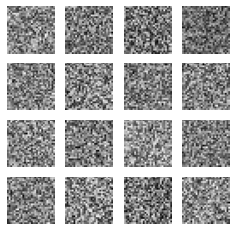

...........................................................................................................................................................................................................................................

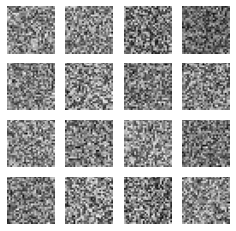

...........................................................................................................................................................................................................................................

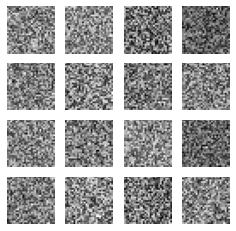

...........................................................................................................................................................................................................................................

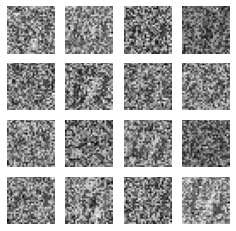

...........................................................................................................................................................................................................................................

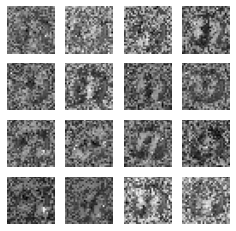

...........................................................................................................................................................................................................................................

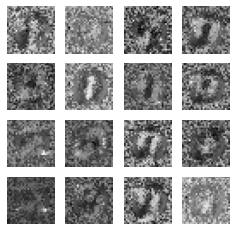

...........................................................................................................................................................................................................................................

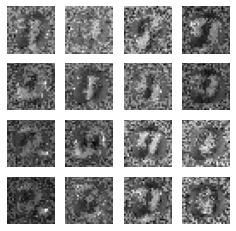

...........................................................................................................................................................................................................................................

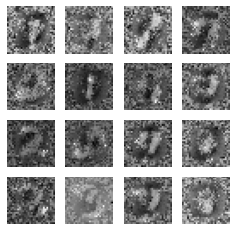

...........................................................................................................................................................................................................................................

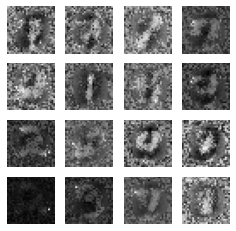

...........................................................................................................................................................................................................................................

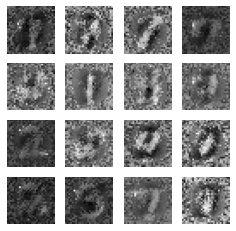

...........................................................................................................................................................................................................................................

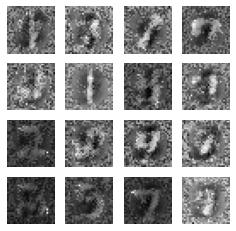

...........................................................................................................................................................................................................................................

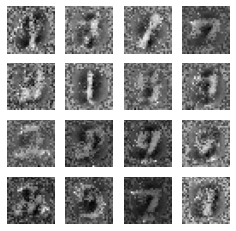

...........................................................................................................................................................................................................................................

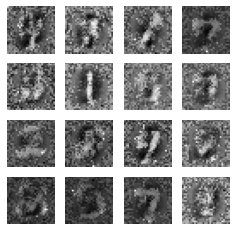

...........................................................................................................................................................................................................................................

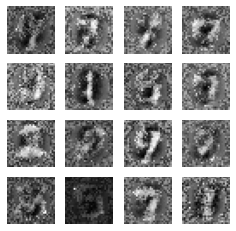

...........................................................................................................................................................................................................................................

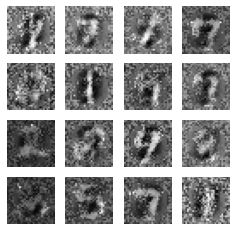

...........................................................................................................................................................................................................................................

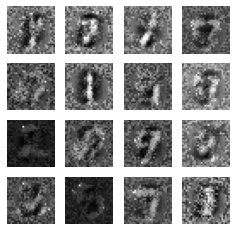

...........................................................................................................................................................................................................................................

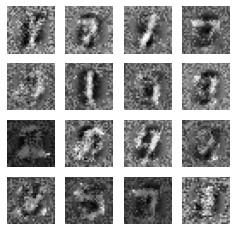

...........................................................................................................................................................................................................................................

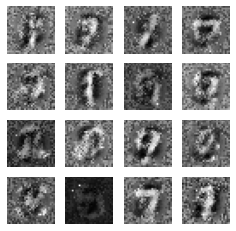

...........................................................................................................................................................................................................................................

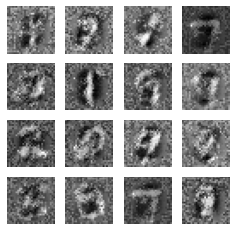

...........................................................................................................................................................................................................................................

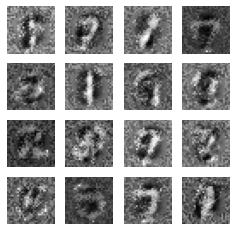

...........................................................................................................................................................................................................................................

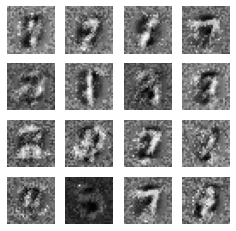

...........................................................................................................................................................................................................................................

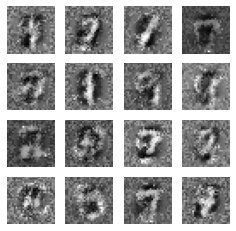

...........................................................................................................................................................................................................................................

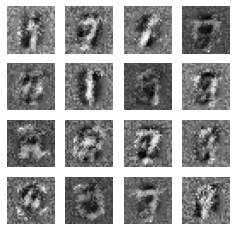

...........................................................................................................................................................................................................................................

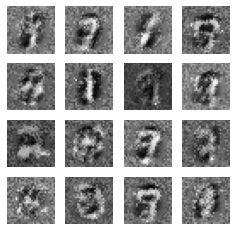

...........................................................................................................................................................................................................................................

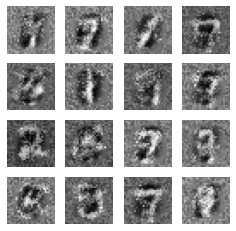

...........................................................................................................................................................................................................................................

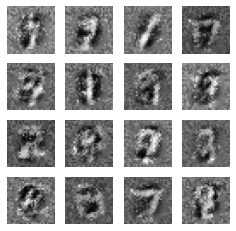

...........................................................................................................................................................................................................................................

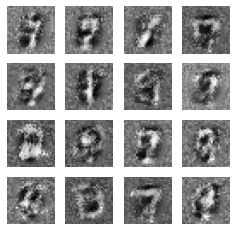

...........................................................................................................................................................................................................................................

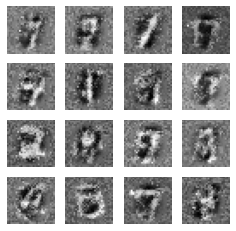

...........................................................................................................................................................................................................................................

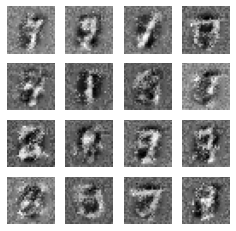

...........................................................................................................................................................................................................................................

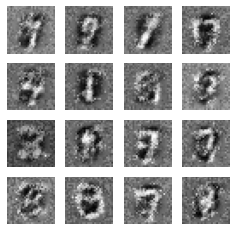

...........................................................................................................................................................................................................................................

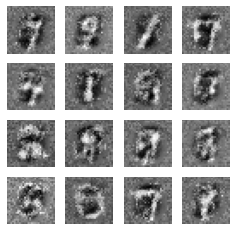

...........................................................................................................................................................................................................................................

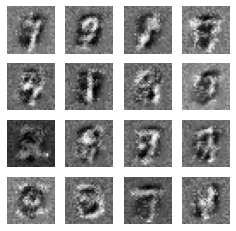

...........................................................................................................................................................................................................................................

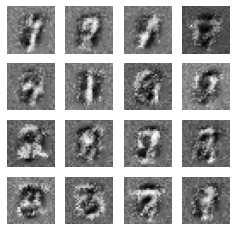

...........................................................................................................................................................................................................................................

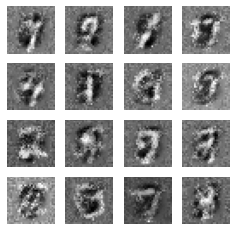

...........................................................................................................................................................................................................................................

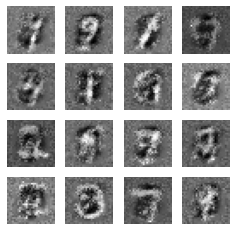

...........................................................................................................................................................................................................................................

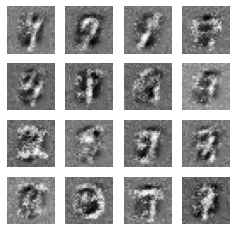

...........................................................................................................................................................................................................................................

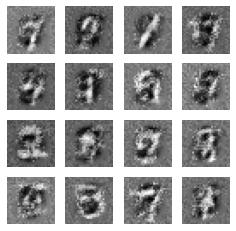

...........................................................................................................................................................................................................................................

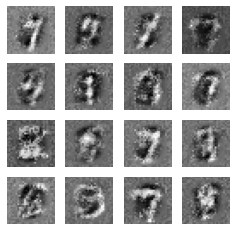

...........................................................................................................................................................................................................................................

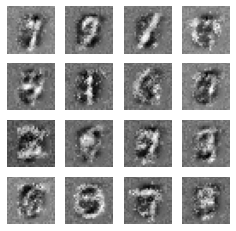

...........................................................................................................................................................................................................................................

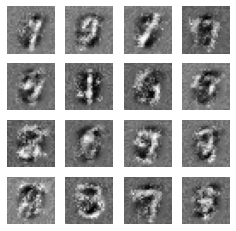

...........................................................................................................................................................................................................................................

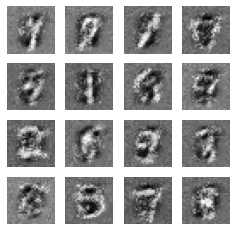

...........................................................................................................................................................................................................................................

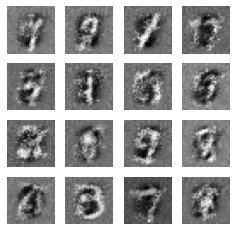

...........................................................................................................................................................................................................................................

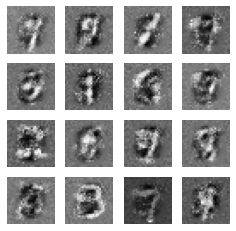

...........................................................................................................................................................................................................................................

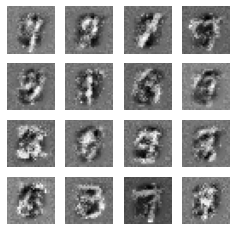

...........................................................................................................................................................................................................................................

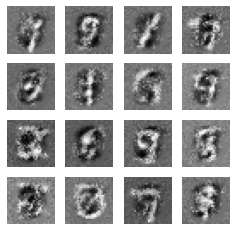

...........................................................................................................................................................................................................................................

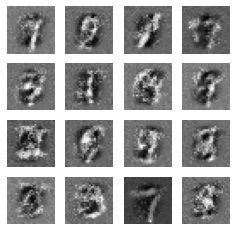

...........................................................................................................................................................................................................................................

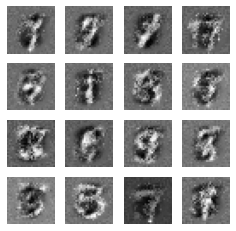

...........................................................................................................................................................................................................................................

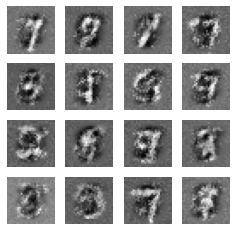

...........................................................................................................................................................................................................................................

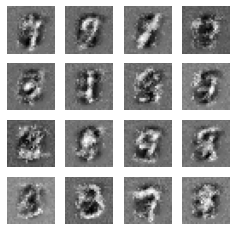

...........................................................................................................................................................................................................................................

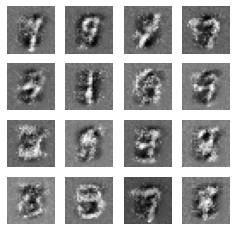

...........................................................................................................................................................................................................................................

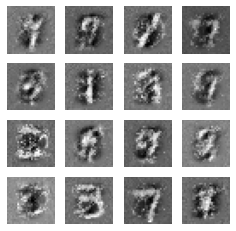

...........................................................................................................................................................................................................................................

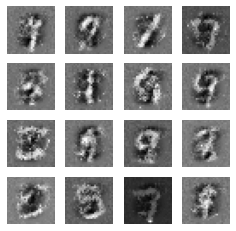

...........................................................................................................................................................................................................................................

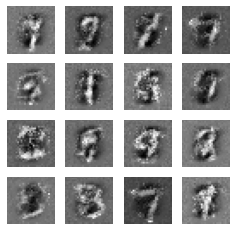

...........................................................................................................................................................................................................................................

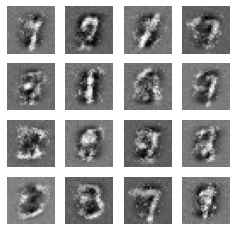

...........................................................................................................................................................................................................................................

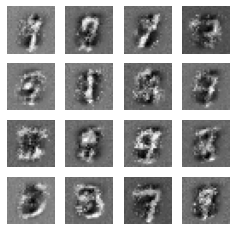

...........................................................................................................................................................................................................................................

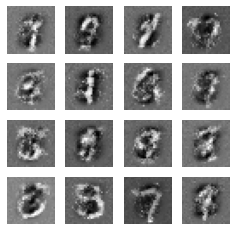

...........................................................................................................................................................................................................................................

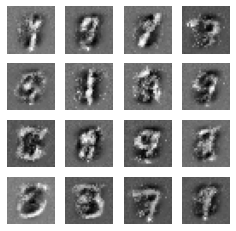

...........................................................................................................................................................................................................................................

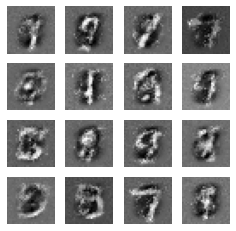

...........................................................................................................................................................................................................................................

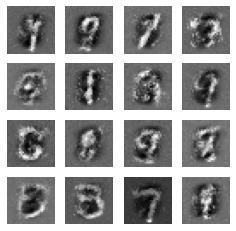

...........................................................................................................................................................................................................................................

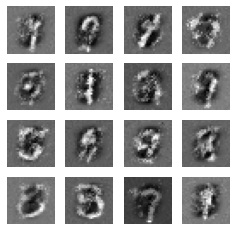

...........................................................................................................................................................................................................................................

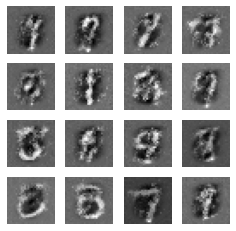

...........................................................................................................................................................................................................................................

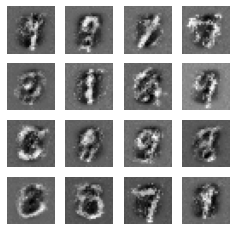

...........................................................................................................................................................................................................................................

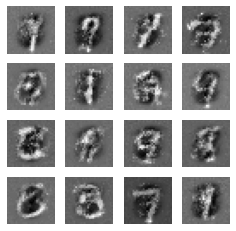

...........................................................................................................................................................................................................................................

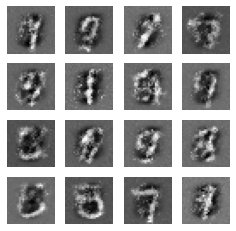

...........................................................................................................................................................................................................................................

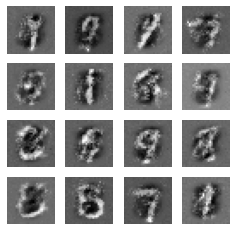

...........................................................................................................................................................................................................................................

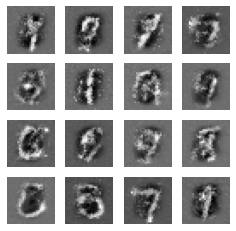

...........................................................................................................................................................................................................................................

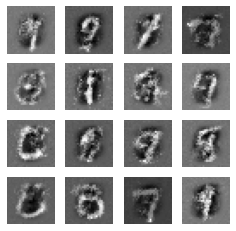

...........................................................................................................................................................................................................................................

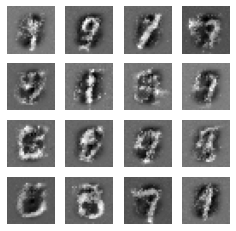

...........................................................................................................................................................................................................................................

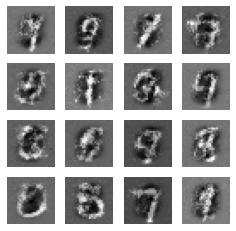

...........................................................................................................................................................................................................................................

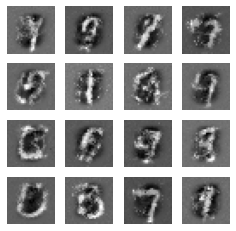

...........................................................................................................................................................................................................................................

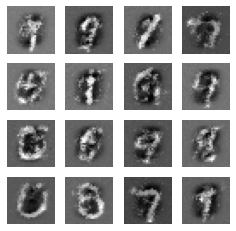

...........................................................................................................................................................................................................................................

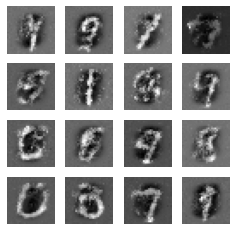

...........................................................................................................................................................................................................................................

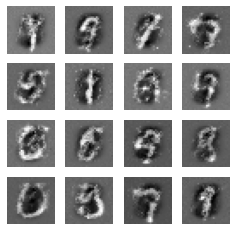

...........................................................................................................................................................................................................................................

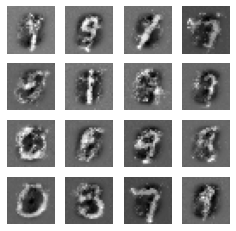

...........................................................................................................................................................................................................................................

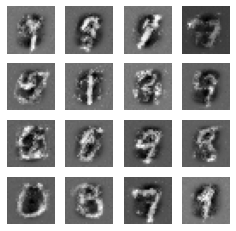

...........................................................................................................................................................................................................................................

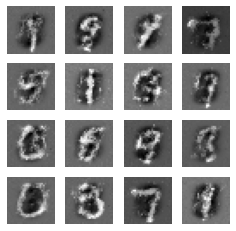

...........................................................................................................................................................................................................................................

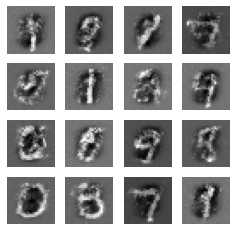

...........................................................................................................................................................................................................................................

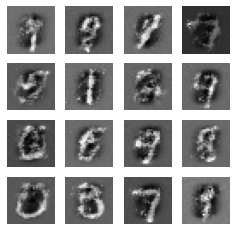

...........................................................................................................................................................................................................................................

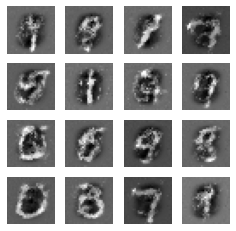

...........................................................................................................................................................................................................................................

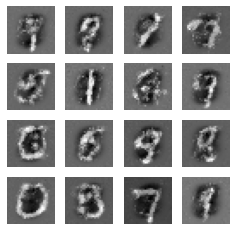

...........................................................................................................................................................................................................................................

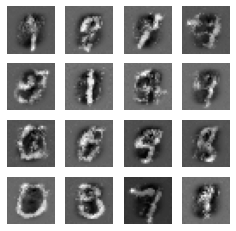

...........................................................................................................................................................................................................................................

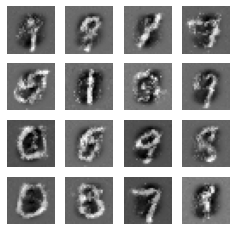

...........................................................................................................................................................................................................................................

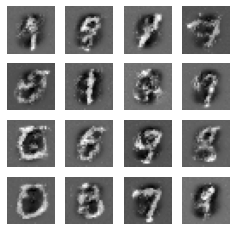

...........................................................................................................................................................................................................................................

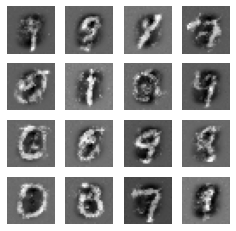

...........................................................................................................................................................................................................................................

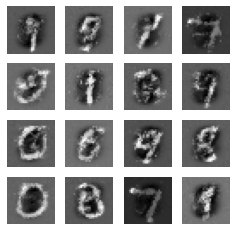

...........................................................................................................................................................................................................................................

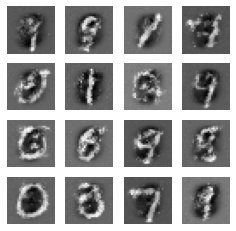

...........................................................................................................................................................................................................................................

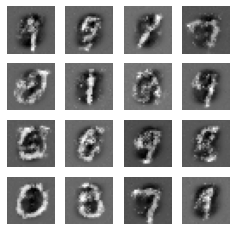

...........................................................................................................................................................................................................................................

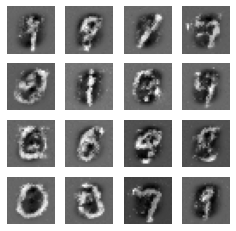

...........................................................................................................................................................................................................................................

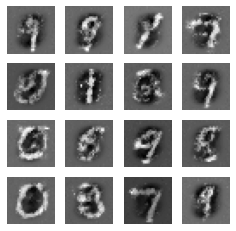

...........................................................................................................................................................................................................................................

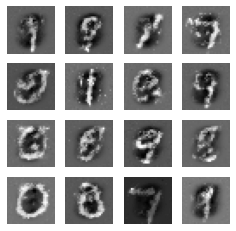

...........................................................................................................................................................................................................................................

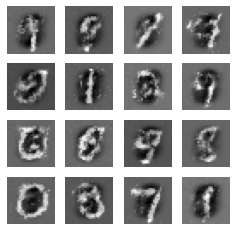

...........................................................................................................................................................................................................................................

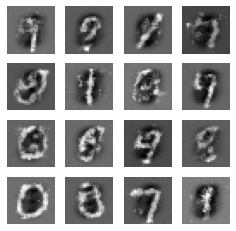

...........................................................................................................................................................................................................................................

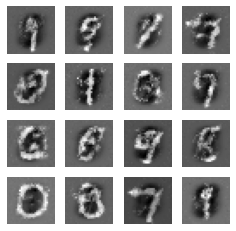

...........................................................................................................................................................................................................................................

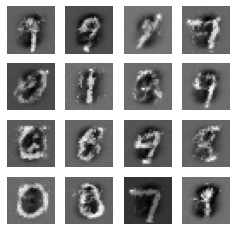

...........................................................................................................................................................................................................................................

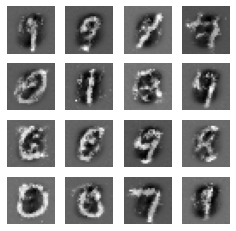

...........................................................................................................................................................................................................................................

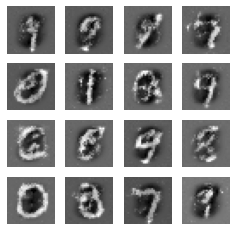

...........................................................................................................................................................................................................................................

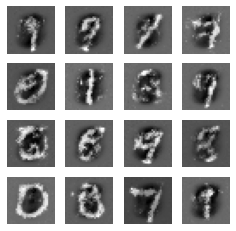

...........................................................................................................................................................................................................................................

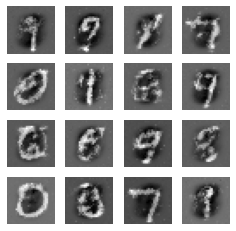

...........................................................................................................................................................................................................................................

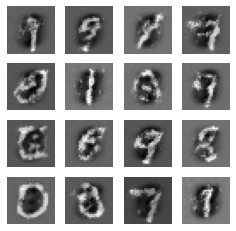

...........................................................................................................................................................................................................................................

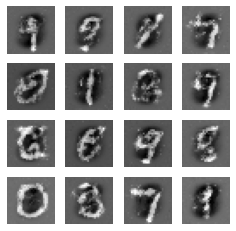

In [346]:
train(datasets, EPOCHS)

In [356]:
i=0
for image_batch in datasets:
    print(image_batch.shape)
    break

(256, 28, 28, 1)
